This script will pull data on saturated vapor pressure from multiple sites around the valley.

I have this from:
- the met station for SPLASH at the townsite
- another met station for SPLASH has RH which can convert
- does radsys have this -> yes can convert
- sled does not have this. Can look for a few other sources

In [1]:
# Import packages
import ftplib
from contextlib import closing
import urllib.request
import io
import os

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import xarray as xr
import act

### SAIL met station data

In [2]:
met_ds = xr.open_dataset('/storage/dlhogan/sos/data/ncdfs/met_ds.nc')

### Other met station data (needed to pull this)

In [3]:
username = 'dlhogan@uw.edu'
token = '7f1c805e6ae94c21'
inpath = '/storage/dlhogan/sos/data'
outpath = '/storage/dlhogan/sos/data/ncdfs'

In [4]:
maws ='gucmawsM1.b1'
start = '2021-11-15'
end = '2022-04-25' 

In [5]:
# Download SAIL met data
if not os.path.exists(inpath+'/maws'):
    print('Downloading Data...')
    act.discovery.download_data(username, token, maws,
                                start, end, output=inpath+'/maws')
    maws_ds=act.io.armfiles.read_netcdf(os.path.join(inpath,f'maws/*.nc'))
else: 
    # not sure why conversion to netcdf isnt working but whatever...
    maws_ds=act.io.armfiles.read_netcdf(os.path.join(inpath,f'maws/*.nc'))
    print(f'Data already downloaded. Located here: {inpath}/maws')


Data already downloaded. Located here: /storage/dlhogan/sos/data/maws


### Radsys relative humidity data

In [6]:
radsys_ds = xr.open_dataset('/storage/dlhogan/sos/data/ncdfs/radsys.nc')

In [7]:
def sat_vapor_pressure(T):
    es_surf = 611.21 * np.exp((22.587 * T) / (T+273.86)) # Magnus formula from Huang 2018
    return es_surf

def sat_vapor_pressure_water(T):
    es_surf = 610.94 * np.exp((17.625*T) / (T + 243.04)) # Magnus formula from Huang 2018
    return es_surf

Text(0.5, 1.0, 'e derived from RH and es(T) (SAIL met)')

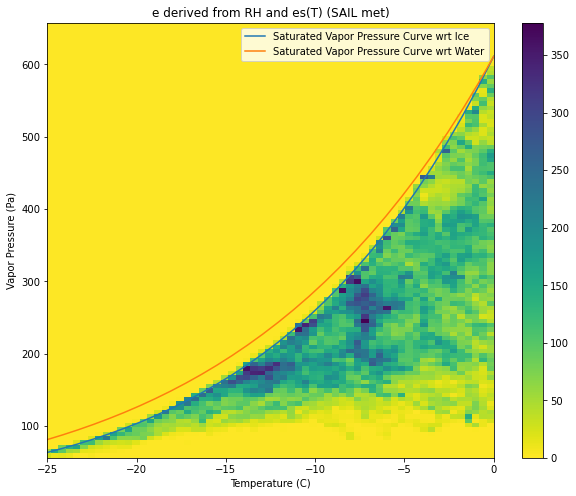

In [9]:
meas_temp = met_ds['temp_mean'].compute()
rh = met_ds['rh_mean']
e_air = rh * sat_vapor_pressure_water(meas_temp)/100

temps = np.linspace(-25,0,30)
es_ice = sat_vapor_pressure(temps)
es_water = sat_vapor_pressure_water(temps)
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(temps,es_ice, label='Saturated Vapor Pressure Curve wrt Ice')
ax.plot(temps,es_water, label='Saturated Vapor Pressure Curve wrt Water')
h = ax.hist2d(meas_temp,e_air,bins=100, cmap='viridis_r');
# ax.scatter(t_surf,es_surf, s=0.2)
ax.set_xlim(-25,0)
fig.colorbar(h[3], ax=ax)
ax.legend()
ax.set_xlabel('Temperature (C)')
ax.set_ylabel('Vapor Pressure (Pa)')
ax.set_title('e derived from RH and es(T) over water (SAIL met)')

Text(0.5, 1.0, 'e derived from RH and es(T) over ice (SAIL met)')

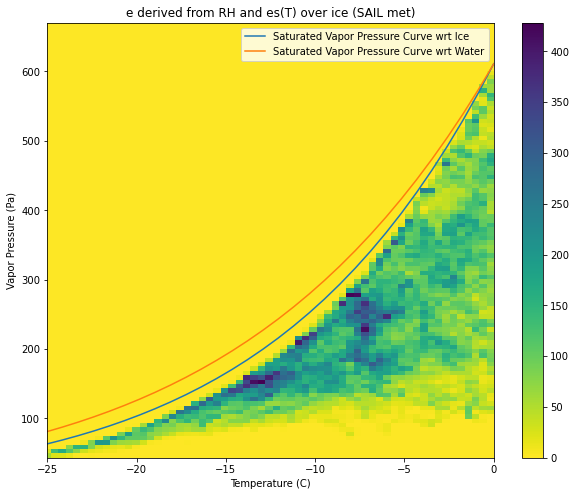

In [10]:
meas_temp = met_ds['temp_mean'].compute()
rh = met_ds['rh_mean']
e_air = rh * sat_vapor_pressure(meas_temp)/100

temps = np.linspace(-25,0,30)
es_ice = sat_vapor_pressure(temps)
es_water = sat_vapor_pressure_water(temps)
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(temps,es_ice, label='Saturated Vapor Pressure Curve wrt Ice')
ax.plot(temps,es_water, label='Saturated Vapor Pressure Curve wrt Water')
h = ax.hist2d(meas_temp,e_air,bins=100, cmap='viridis_r');
# ax.scatter(t_surf,es_surf, s=0.2)
ax.set_xlim(-25,0)
fig.colorbar(h[3], ax=ax)
ax.legend()
ax.set_xlabel('Temperature (C)')
ax.set_ylabel('Vapor Pressure (Pa)')
ax.set_title('e derived from RH and es(T) over ice (SAIL met)')

Text(0.5, 1.0, 'e derived measurement (SAIL met)')

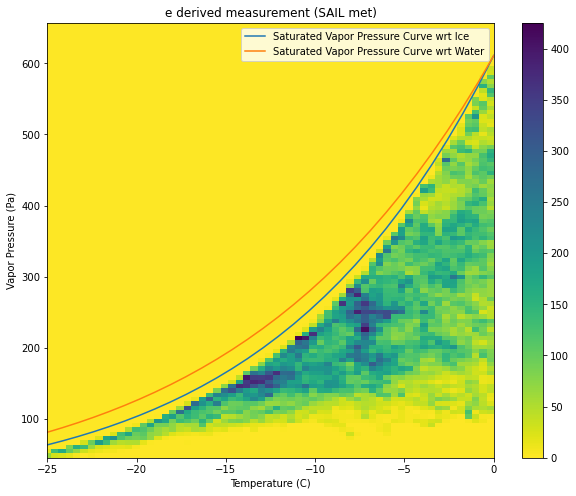

In [25]:
meas_temp = met_ds['temp_mean'].compute()
e_air = met_ds['vapor_pressure_mean']*1000

temps = np.linspace(-25,0,30)
es_ice = sat_vapor_pressure(temps)
es_water = sat_vapor_pressure_water(temps)
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(temps,es_ice, label='Saturated Vapor Pressure Curve wrt Ice')
ax.plot(temps,es_water, label='Saturated Vapor Pressure Curve wrt Water')
h = ax.hist2d(meas_temp,e_air,bins=100, cmap='viridis_r');
# ax.scatter(t_surf,es_surf, s=0.2)
ax.set_xlim(-25,0)
fig.colorbar(h[3], ax=ax)
ax.legend()
ax.set_xlabel('Temperature (C)')
ax.set_ylabel('Vapor Pressure (Pa)')
ax.set_title('e derived measurement (SAIL met)')

Text(0.5, 1.0, 'e derived from RH and es(T) over water(SPLASH Radsys)')

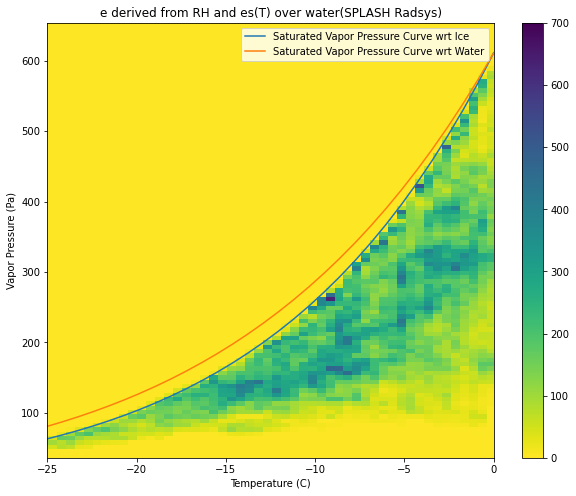

In [62]:
meas_temp = radsys_ds['AirTemp'].where(radsys_ds['AirTemp_qc']==0).interpolate_na(dim='DateTime', method='nearest')
rh = radsys_ds['RH'].where(radsys_ds['RH_qc']==0).interpolate_na(dim='DateTime',method='nearest')
e_air = rh * sat_vapor_pressure_water(meas_temp)/100

temps = np.linspace(-25,0,30)
es_ice = sat_vapor_pressure(temps)
es_water = sat_vapor_pressure_water(temps)
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(temps,es_ice, label='Saturated Vapor Pressure Curve wrt Ice')
ax.plot(temps,es_water, label='Saturated Vapor Pressure Curve wrt Water')
h = ax.hist2d(meas_temp,e_air,bins=100, cmap='viridis_r', vmax=700);
# ax.scatter(t_surf,es_surf, s=0.2)
ax.set_xlim(-25,0)
fig.colorbar(h[3], ax=ax)
ax.legend()
ax.set_xlabel('Temperature (C)')
ax.set_ylabel('Vapor Pressure (Pa)')
ax.set_title('e derived from RH and es(T) over water (SPLASH Radsys)')

Text(0.5, 1.0, 'e derived from RH and es(T) over ice (SAIL maws)')

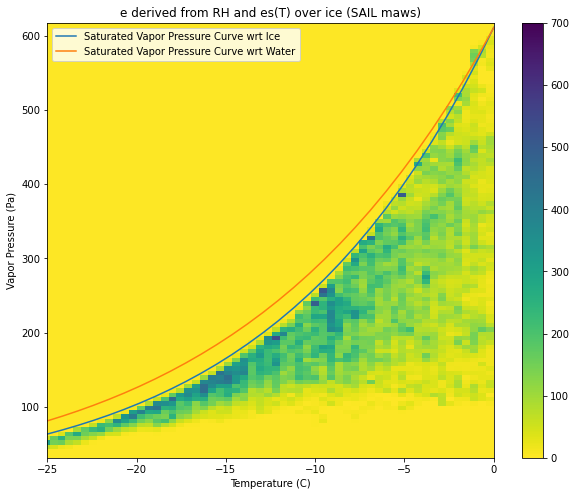

In [63]:
meas_temp = maws_ds['atmospheric_temperature'].compute().interpolate_na(dim='time', method='nearest')
rh = maws_ds['atmospheric_relative_humidity'].compute().interpolate_na(dim='time', method='nearest')
e_air = rh * sat_vapor_pressure(meas_temp)/100

temps = np.linspace(-25,0,30)
es_ice = sat_vapor_pressure(temps)
es_water = sat_vapor_pressure_water(temps)
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(temps,es_ice, label='Saturated Vapor Pressure Curve wrt Ice')
ax.plot(temps,es_water, label='Saturated Vapor Pressure Curve wrt Water')
h = ax.hist2d(meas_temp,e_air,bins=100, cmap='viridis_r', vmax=700);
# ax.scatter(t_surf,es_surf, s=0.2)
ax.set_xlim(-25,0)
fig.colorbar(h[3], ax=ax)
ax.legend()
ax.set_xlabel('Temperature (C)')
ax.set_ylabel('Vapor Pressure (Pa)')
ax.set_title('e derived from RH and es(T) over ice (SAIL maws)')

Text(0.5, 1.0, 'e derived from RH and es(T) over water (SAIL maws)')

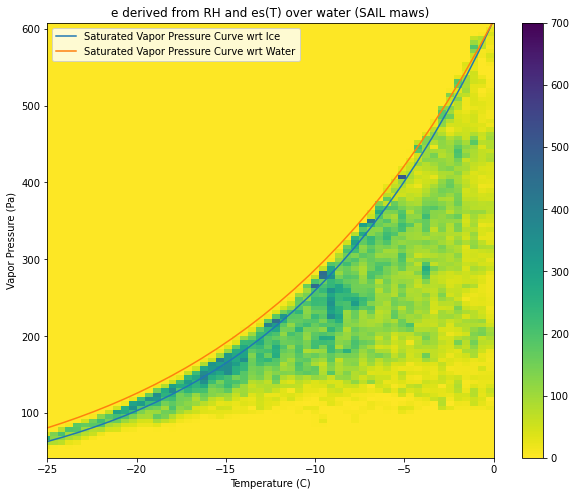

In [64]:
meas_temp = maws_ds['atmospheric_temperature'].compute().interpolate_na(dim='time', method='nearest')
rh = maws_ds['atmospheric_relative_humidity'].compute().interpolate_na(dim='time', method='nearest')
e_air = rh * sat_vapor_pressure_water(meas_temp)/100

temps = np.linspace(-25,0,30)
es_ice = sat_vapor_pressure(temps)
es_water = sat_vapor_pressure_water(temps)
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(temps,es_ice, label='Saturated Vapor Pressure Curve wrt Ice')
ax.plot(temps,es_water, label='Saturated Vapor Pressure Curve wrt Water')
h = ax.hist2d(meas_temp,e_air,bins=100, cmap='viridis_r', vmax=700);
# ax.scatter(t_surf,es_surf, s=0.2)
ax.set_xlim(-25,0)
fig.colorbar(h[3], ax=ax)
ax.legend()
ax.set_xlabel('Temperature (C)')
ax.set_ylabel('Vapor Pressure (Pa)')
ax.set_title('e derived from RH and es(T) over water (SAIL maws)')

In [65]:
ecor_ds = xr.open_dataset('/storage/dlhogan/sos/data/ncdfs/ecor_gts_ds.nc')

In [99]:
u_star = ecor_ds['ustar']
cov_wT = ecor_ds['cvar_wt']
mean_t = ecor_ds['mean_t']
g = 9.81
k = 0.4
z = 3

obukhov_length = -u_star**3 * mean_t / (k * g * cov_wT)
stability_param = z / obukhov_length

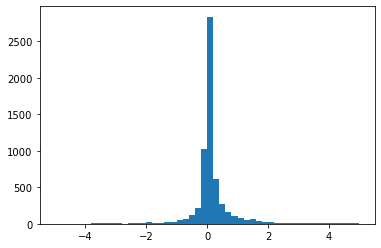

In [103]:
stability_param.plot.hist(bins=50, range=(-5,5));

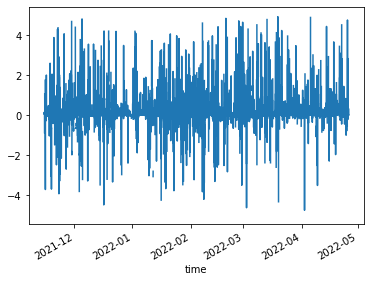

In [104]:
stability_param.where((stability_param >-5) & (stability_param <5)).plot()